In [92]:
## naman solanki
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
## news healines
news_df = pd.read_csv('india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [58]:
len(news_df.headline_category.unique())

1016

In [73]:
hist_df = pd.read_csv('^BSESN.csv')
hist_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-26,40194.890625,40255.390625,39760.390625,39888.960938,39888.960938,9000.0
1,2020-02-27,39947.800781,39947.800781,39423.269531,39745.660156,39745.660156,9600.0
2,2020-02-28,39087.468750,39087.468750,38219.968750,38297.289063,38297.289063,12700.0
3,2020-03-02,38910.949219,39083.171875,37785.988281,38144.019531,38144.019531,13400.0
4,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0


In [59]:
### Going to new_df
news_df["publish_date"] = pd.to_datetime(news_df["publish_date"],format='%Y%m%d')
news_df.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [60]:
news_df.headline_category.mode()

0    india
dtype: object

In [61]:
news_df[news_df['headline_category']!='india'].headline_category.mode()

0    unknown
dtype: object

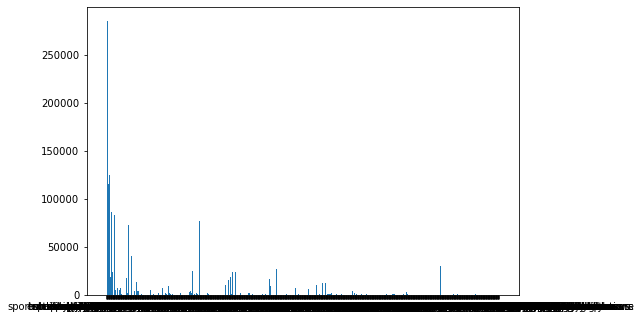

In [62]:
# unknowns are our missing values
## we need to handle them first
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categories = news_df.headline_category.unique()
numbers = [len(news_df[news_df['headline_category']==i]) for i in news_df.headline_category.unique()]
ax.bar(categories,numbers)
plt.show()

### As we can there is a bar very high than others and since we know the mode of headline_category is 'india', we can replace unknown with it
#### Using mode imputation

In [63]:
# np.where(news_df[news_df['headline_category'] != 'unknown'], news_df.headline_category, 'indi')
news_df['headline_category'].replace('unknown', 'india', inplace=True)
news_df.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,india,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,india,Fissures in Hurriyat over Pak visit
3,2001-01-02,india,America's unwanted heading for India?
4,2001-01-02,india,For bigwigs; it is destination Goa


In [66]:
news_df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [70]:
#removing unwanted characters from the News
news_df.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
news_df["headline_text"].head()

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya  s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India 
4                   For bigwigs  it is destination Goa
Name: headline_text, dtype: object

In [76]:
hist_df.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [74]:
hist_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998217,0.997957,0.996022,0.996022,-0.220290
High,0.998217,1.000000,0.996820,0.998269,0.998269,-0.205838
Low,0.997957,0.996820,1.000000,0.997879,0.997879,-0.223622
Close,0.996022,0.998269,0.997879,1.000000,1.000000,-0.209717
Adj Close,0.996022,0.998269,0.997879,1.000000,1.000000,-0.209717
Volume,-0.220290,-0.205838,-0.223622,-0.209717,-0.209717,1.000000


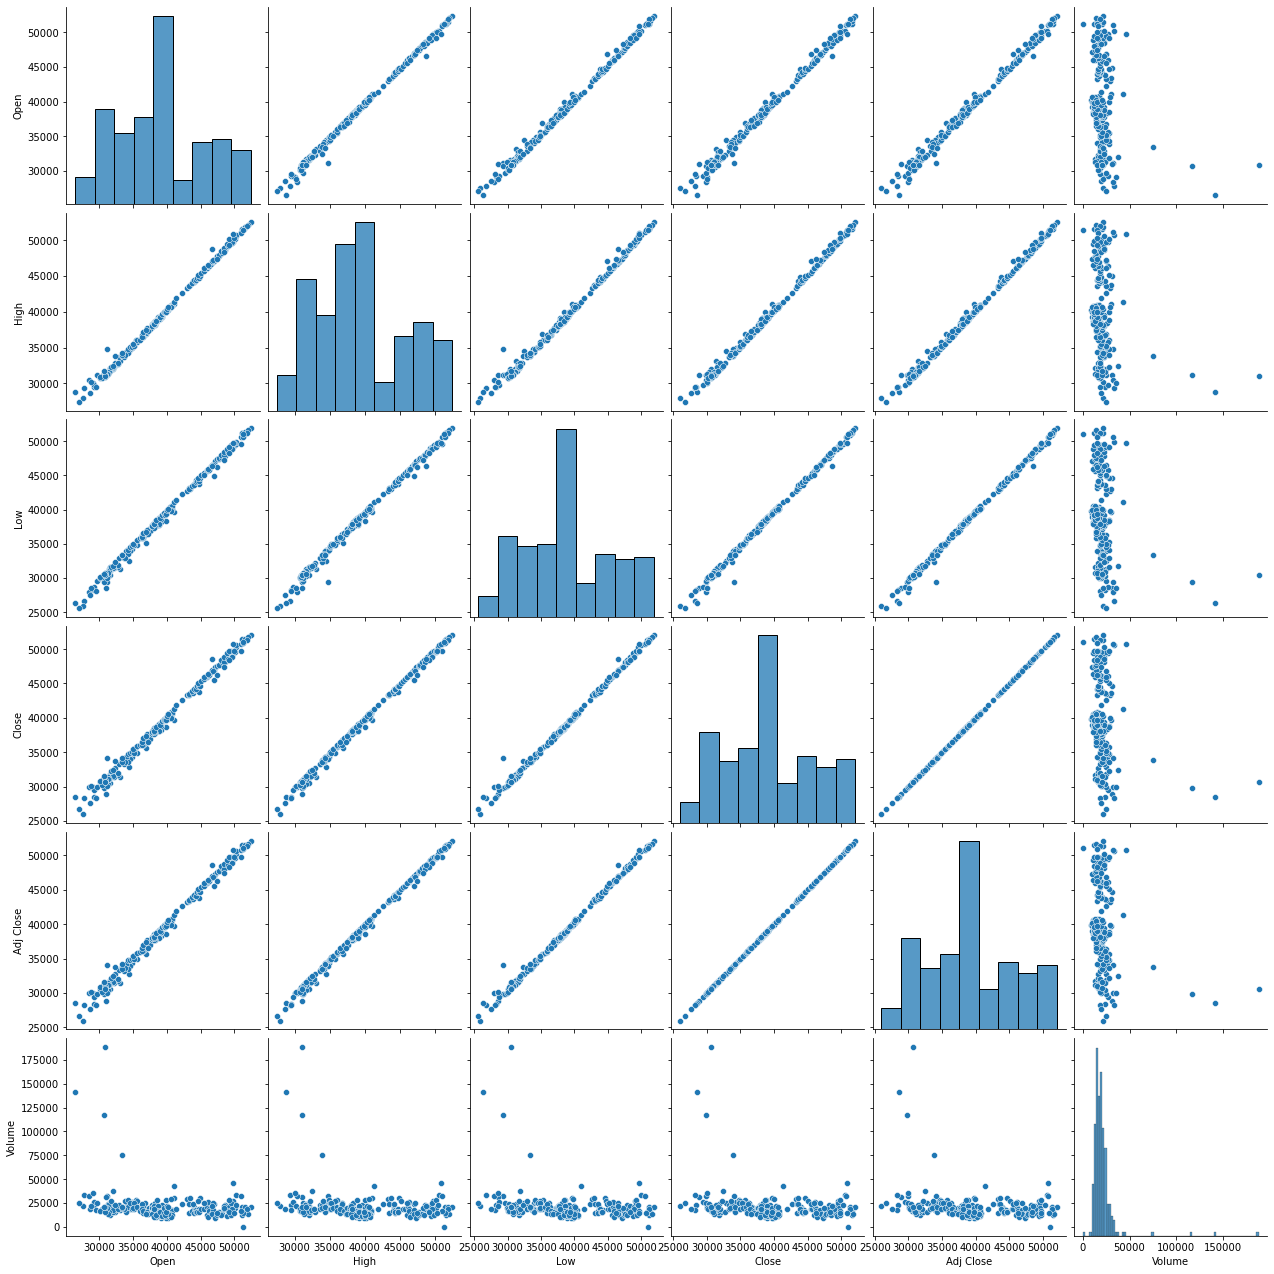

In [75]:
sns.pairplot(hist_df, height=3)

In [80]:
hist_df.drop(['Close', 'Adj Close', 'High', 'Low'], axis=1, inplace=True)
hist_df.head()

,Date,Open,Volume
0,2020-02-26,40194.890625,9000.0
1,2020-02-27,39947.800781,9600.0
2,2020-02-28,39087.468750,12700.0
3,2020-03-02,38910.949219,13400.0
4,2020-03-03,38480.890625,10600.0


In [81]:
hist_df.corr()

,Open,Volume
Open,1.00000,-0.22029
Volume,-0.22029,1.00000


Text(0, 0.5, 'BSESN')

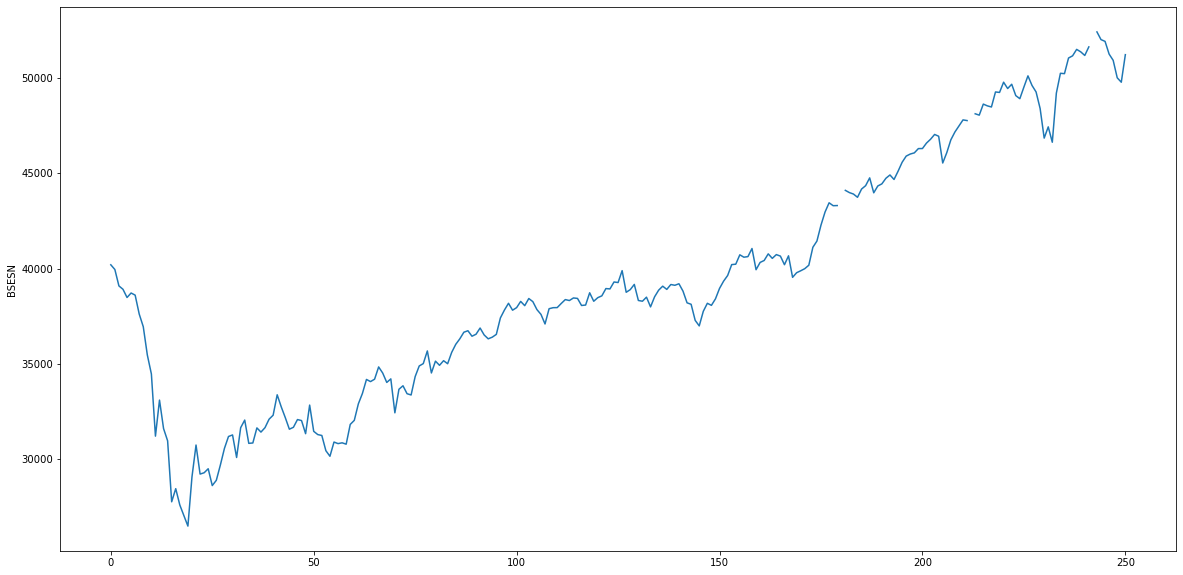

In [82]:
plt.figure(figsize=(20,10))
hist_df['Open'].plot()
plt.ylabel('BSESN')

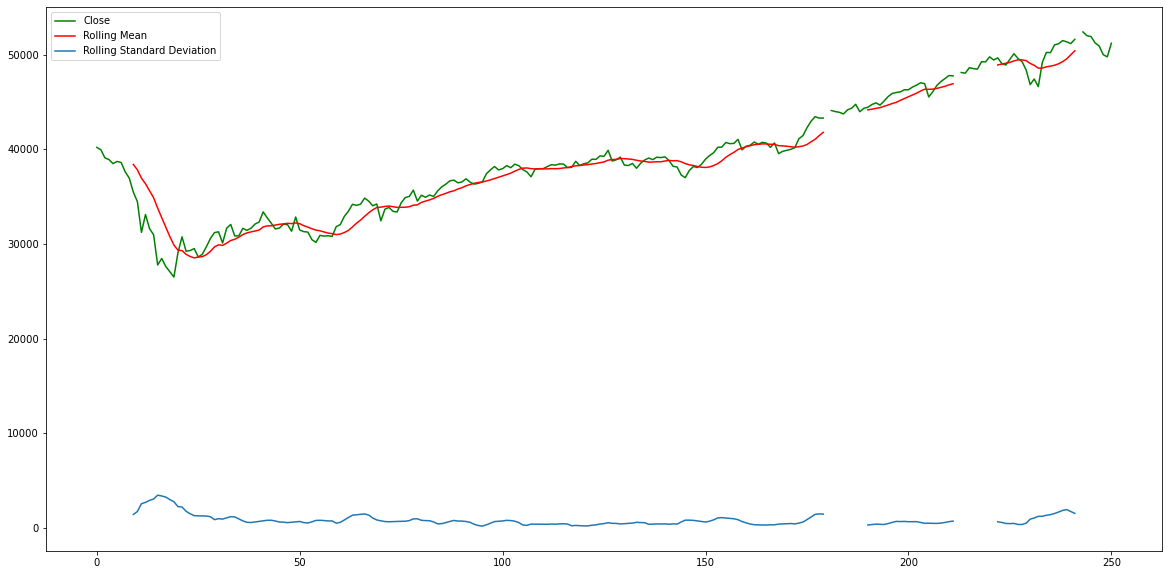

In [87]:
#Plotting moving average
Open = hist_df['Open']

ma = Open.rolling(window = 10).mean()
std = Open.rolling(window = 10).std()

plt.figure(figsize=(20,10))
hist_df['Open'].plot(color='g',label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

Text(0.5, 1.0, 'Returns')

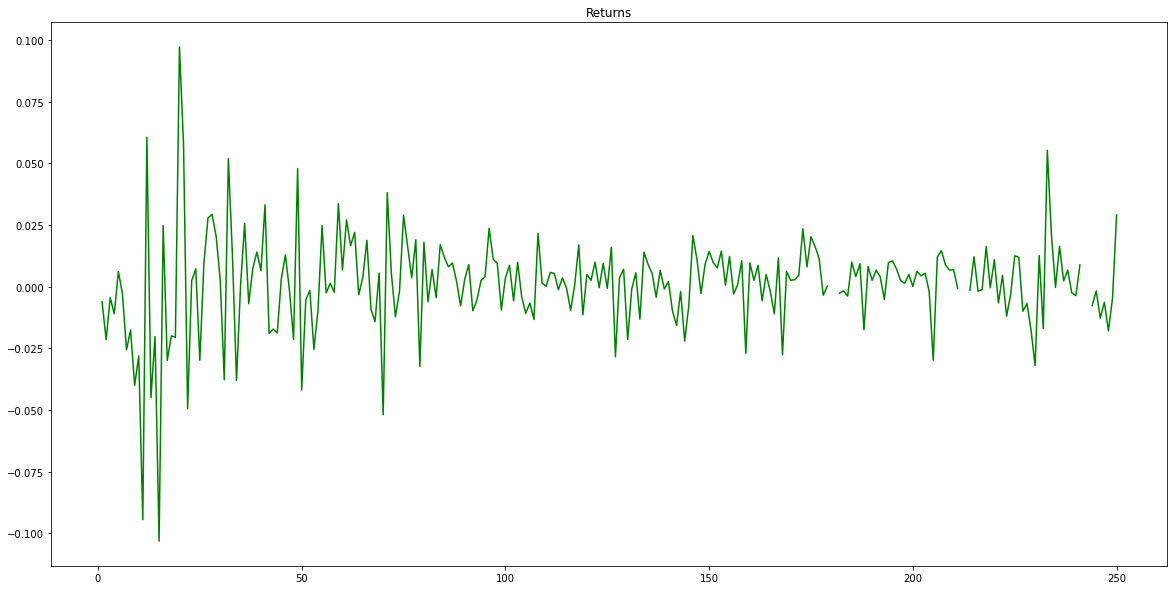

In [88]:
#Plotting returns
returns = Open / Open.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [89]:
hist_df.shape

(251, 3)

In [100]:
hist_df.isnull().sum()

Date      0
Open      3
Volume    3
dtype: int64

In [101]:
hist_df.Open.fillna(hist_df.Open.mean(), inplace=True)
hist_df.Volume.fillna(hist_df.Volume.mean(), inplace=True)
hist_df.isnull().sum()

Date      0
Open      0
Volume    0
dtype: int64

In [102]:
train = hist_df[:200]
test = hist_df[200:]
train

,Date,Open,Volume
0,2020-02-26,40194.890625,9000.0
1,2020-02-27,39947.800781,9600.0
2,2020-02-28,39087.468750,12700.0
3,2020-03-02,38910.949219,13400.0
4,2020-03-03,38480.890625,10600.0
...,...,...,...
195,2020-12-08,45568.800781,18200.0
196,2020-12-09,45891.039063,20700.0
197,2020-12-10,45999.421875,12700.0
198,2020-12-11,46060.320313,26300.0


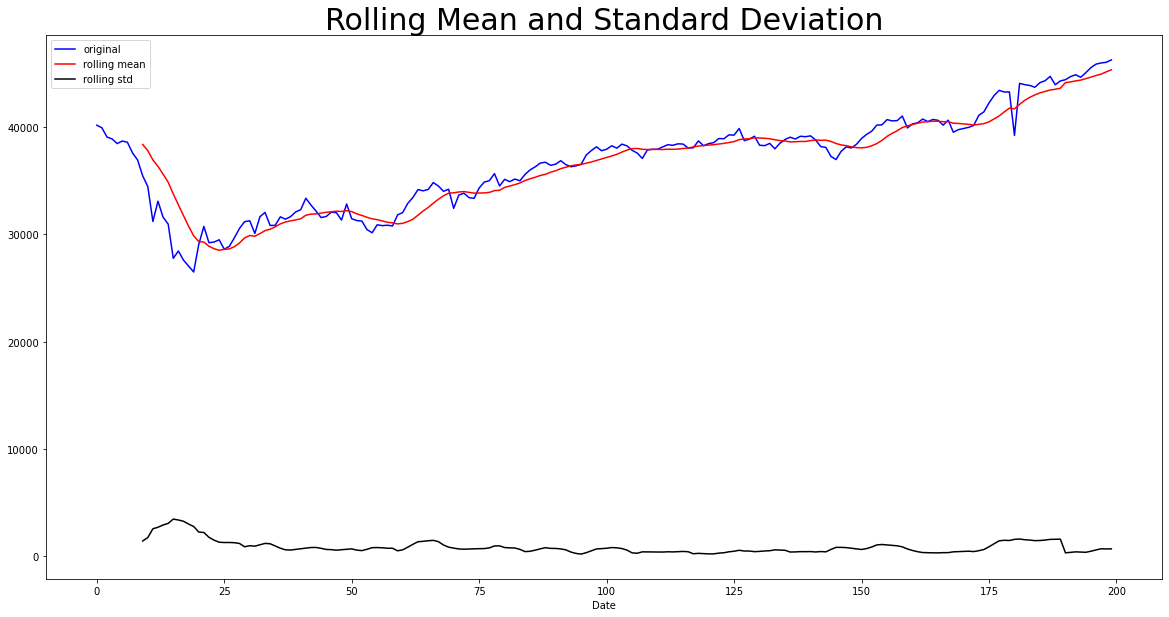

Results of dickey fuller test
ADF Test Statistic : -0.12152432983318277
p-value : 0.9472519754501683
#Lags Used : 1
Number of Observations Used : 198
Weak evidence against null hypothesis, time series is non-stationary 


In [103]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
# Stationarity test
def test_stationarity(timeseries):
    #Determine the rolling statistics
    rolmean = timeseries.rolling(10).mean()
    rolstd = timeseries.rolling(10).std()
    #Plot rolling statistics:
    plt.figure(figsize = (20,10))
    plt.plot(timeseries, color = 'blue', label = 'original')
    plt.plot(rolmean, color = 'r', label = 'rolling mean')
    plt.plot(rolstd, color = 'black', label = 'rolling std')
    plt.xlabel('Date')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',  fontsize = 30)
    plt.show(block = False)
    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Open'])

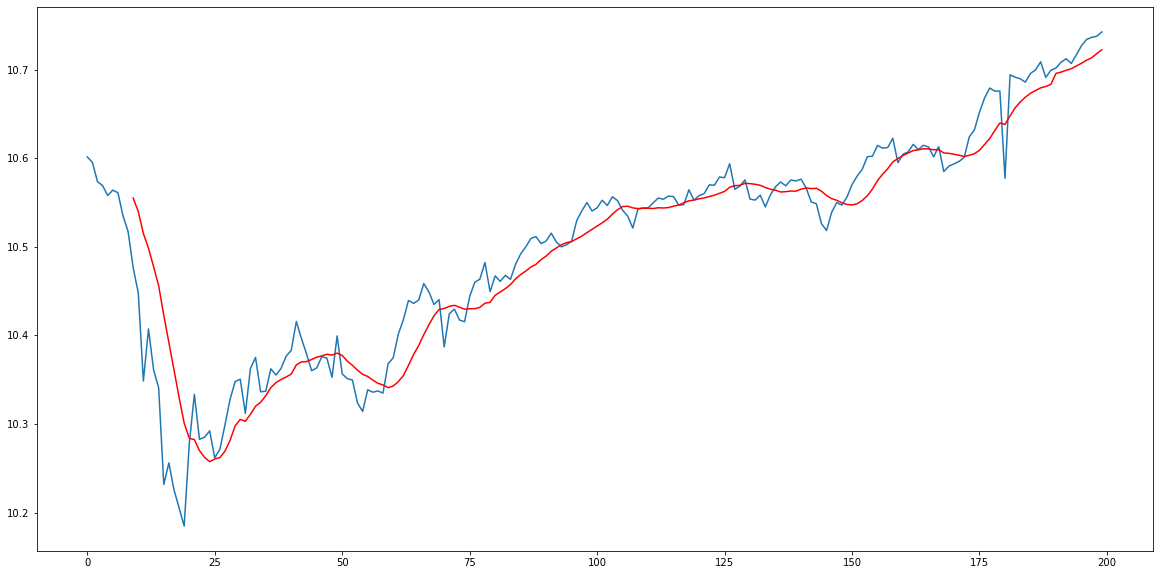

In [105]:
train_log = np.log(train['Open']) 
test_log = np.log(test['Open'])

mav = train_log.rolling(10).mean() 
plt.figure(figsize = (20,10))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

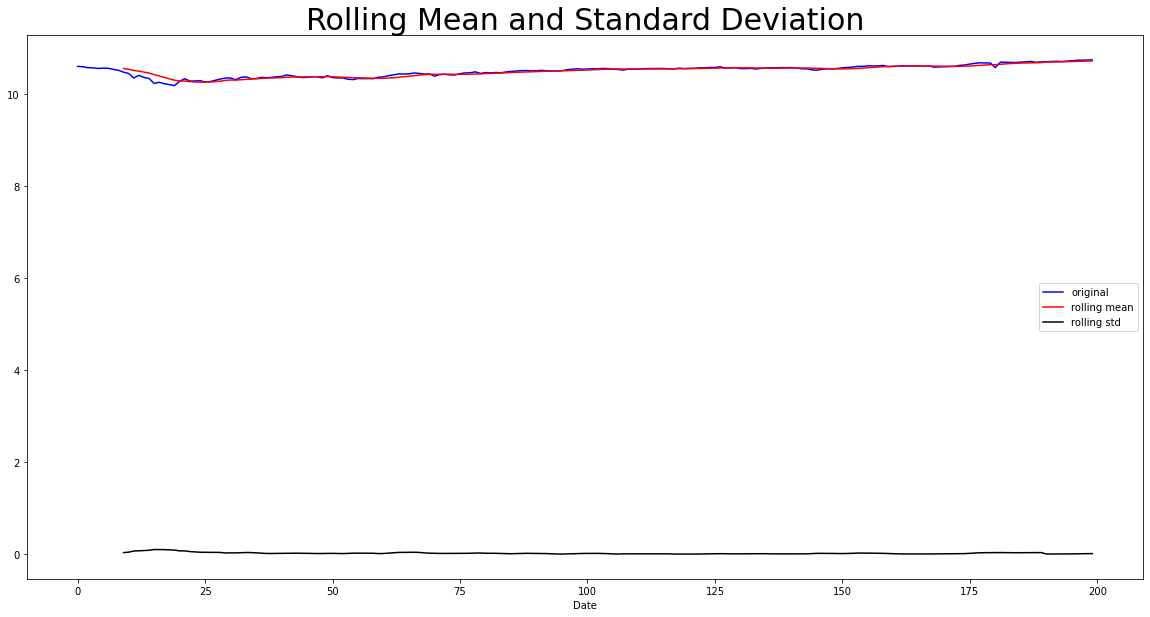

Results of dickey fuller test
ADF Test Statistic : -0.4794159482191818
p-value : 0.8959711299196518
#Lags Used : 2
Number of Observations Used : 197
Weak evidence against null hypothesis, time series is non-stationary 


In [106]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

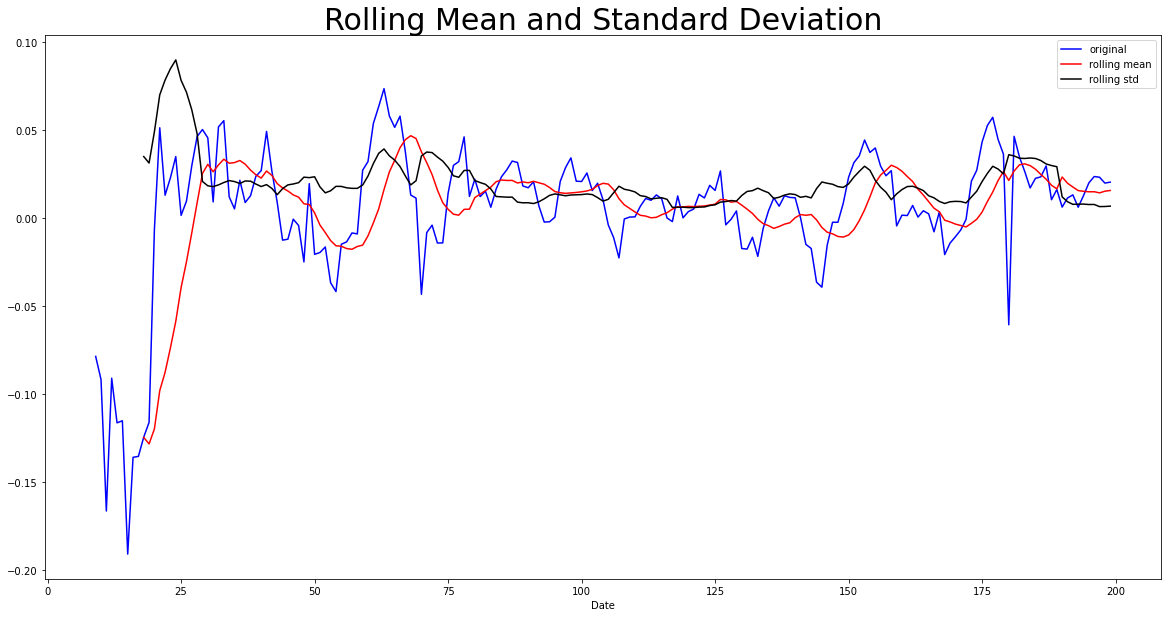

Results of dickey fuller test
ADF Test Statistic : -5.211037240907072
p-value : 8.34718802750494e-06
#Lags Used : 4
Number of Observations Used : 186
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [107]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [118]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-916.798, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-918.665, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-922.523, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-921.889, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-920.489, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-920.821, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-922.266, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-920.635, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-924.274, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-922.593, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-922.577, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-923.636, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-923.025, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.975 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [126]:
predictions = model.predict(n_periods = len(test))

In [127]:
len(test_log)

51

In [128]:
len(predictions)

51

In [129]:
len(test)

51

In [124]:
predictions

array([10.74174211, 10.74188204, 10.74185829, 10.74186232, 10.74186164,
       10.74186176, 10.74186174, 10.74186174, 10.74186174, 10.74186174])

In [130]:
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Text(0, 0.5, 'Actual Stock Price')

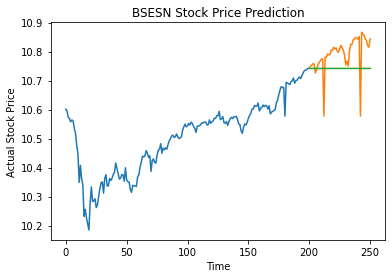

In [131]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [133]:
#Calculating error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.07488947814113292


### Now we need to do Sentiment analysis of the news_df(news headlines)

In [135]:
!pip install textblob

In [136]:
import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler

In [137]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity
news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df.head()

,publish_date,headline_category,headline_text,Subjectivity,Polarity
0,2001-01-01,sports wwe,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,india,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000
2,2001-01-02,india,Fissures in Hurriyat over Pak visit,0.000000,0.000000
3,2001-01-02,india,America's unwanted heading for India,0.000000,0.000000
4,2001-01-02,india,For bigwigs it is destination Goa,0.000000,0.000000


In [138]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()
news_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_df['headline_text']]
news_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_df['headline_text']]
news_df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_df['headline_text']]
news_df['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_df['headline_text']]
news_df

,publish_date,headline_category,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,sports wwe,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,india,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000,0.2924,0.000,0.805,0.195
2,2001-01-02,india,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2001-01-02,india,America's unwanted heading for India,0.000000,0.000000,-0.2263,0.322,0.678,0.000
4,2001-01-02,india,For bigwigs it is destination Goa,0.000000,0.000000,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...
3297167,2020-06-30,gadgets news,why tiktok removed crore videos in india,0.000000,0.000000,0.0000,0.000,1.000,0.000
3297168,2020-06-30,entertainment hindi bollywood,apurva asrani calls alia bhatts mother soni ra...,0.000000,0.000000,0.0000,0.000,1.000,0.000
3297169,2020-06-30,entertainment hindi bollywood,kangana ranaut gets a doll version of herself ...,0.454545,0.136364,0.2960,0.000,0.885,0.115
3297170,2020-06-30,entertainment hindi bollywood,meezaan jaffrey reminisces his childhood days ...,1.000000,0.500000,0.4939,0.000,0.814,0.186


In [141]:
### Now we have done the neccessary analysis, we need to merge these two datasets and build a model for future predictions
news_df.rename(columns = {'publish_date':'Date'}, inplace = True)
news_df.head()

,Date,headline_category,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,sports wwe,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,india,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000,0.2924,0.000,0.805,0.195
2,2001-01-02,india,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2001-01-02,india,America's unwanted heading for India,0.000000,0.000000,-0.2263,0.322,0.678,0.000
4,2001-01-02,india,For bigwigs it is destination Goa,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [151]:
hist_df["Date"] = pd.to_datetime(hist_df["Date"],infer_datetime_format=True)
print(hist_df.head())
type(hist_df['Date'][0])

        Date          Open   Volume
0 2020-02-26  40194.890625   9000.0
1 2020-02-27  39947.800781   9600.0
2 2020-02-28  39087.468750  12700.0
3 2020-03-02  38910.949219  13400.0
4 2020-03-03  38480.890625  10600.0


pandas._libs.tslibs.timestamps.Timestamp

In [152]:
df_merge = pd.merge(hist_df, news_df, how='inner', on='Date')
df_merge.head()

,Date,Open,Volume,headline_category,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-02-26,40194.890625,9000.0,city trichy,Naval band's performance at National College c...,0.0,0.0,0.0000,0.000,1.000,0.0
1,2020-02-26,40194.890625,9000.0,city nashik,Poultry biz hit as coronavirus misinformation ...,0.0,0.0,-0.3182,0.247,0.753,0.0
2,2020-02-26,40194.890625,9000.0,city hyderabad,Rise in TB cases among youngsters in slums,0.0,0.0,0.0000,0.000,1.000,0.0
3,2020-02-26,40194.890625,9000.0,city hyderabad,Protest meet by civil rights groups at Indira ...,0.0,0.0,-0.2500,0.200,0.800,0.0
4,2020-02-26,40194.890625,9000.0,city hyderabad,HC notice to Telangana revenue staff over lan...,0.0,0.0,0.0000,0.000,1.000,0.0


In [153]:
## Model Building
dfmerge1 = df_merge[['Open','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
dfmerge1.head()

,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,40194.890625,0.0,0.0,0.0000,0.000,1.000,0.0
1,40194.890625,0.0,0.0,-0.3182,0.247,0.753,0.0
2,40194.890625,0.0,0.0,0.0000,0.000,1.000,0.0
3,40194.890625,0.0,0.0,-0.2500,0.200,0.800,0.0
4,40194.890625,0.0,0.0,0.0000,0.000,1.000,0.0


In [154]:
### Feature Scaling
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(dfmerge1))
df.columns = dfmerge1.columns
df.index = dfmerge1.index
df.head()

,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,1.0,0.0,0.5,0.499501,0.000,1.000,0.0
1,1.0,0.0,0.5,0.332406,0.247,0.753,0.0
2,1.0,0.0,0.5,0.499501,0.000,1.000,0.0
3,1.0,0.0,0.5,0.368219,0.200,0.800,0.0
4,1.0,0.0,0.5,0.499501,0.000,1.000,0.0


In [158]:
## Now open will be our output/ dependent variable and other features will be our independent variables
X = df.drop(['Open'], axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.000000,0.500000,0.499501,0.000,1.000,0.000000
1,0.000000,0.500000,0.332406,0.247,0.753,0.000000
2,0.000000,0.500000,0.499501,0.000,1.000,0.000000
3,0.000000,0.500000,0.368219,0.200,0.800,0.000000
4,0.000000,0.500000,0.499501,0.000,1.000,0.000000
...,...,...,...,...,...,...
41483,0.000000,0.500000,0.499501,0.000,1.000,0.000000
41484,0.000000,0.500000,0.499501,0.000,1.000,0.000000
41485,0.454545,0.568182,0.654939,0.000,0.885,0.139394
41486,1.000000,0.750000,0.758862,0.000,0.814,0.225455


In [159]:
y = df['Open']
y

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
41483    0.632964
41484    0.632964
41485    0.632964
41486    0.632964
41487    0.632964
Name: Open, Length: 41488, dtype: float64

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(33190, 6)

In [169]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def predictor(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print('Mean Squared error: ',mean_squared_error(predictions,y_test))

In [170]:
## Random Forest Regressor Model
rf = RandomForestRegressor()
predictor(rf)

Mean Squared error:  0.04816266410441219


In [172]:
## Ada Boost Regressor
adb = AdaBoostRegressor()
predictor(adb)

Mean Squared error:  0.04630622437854048


In [173]:
##LGBM Regressor
gbm = lightgbm.LGBMRegressor()
predictor(gbm)

Mean Squared error:  0.045571809796871796


In [174]:
## XGB Regressor
xgb = xgboost.XGBRegressor()
predictor(xgb)

Mean Squared error:  0.046217734323621466


In [175]:
## Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
predictor(lr)

Mean Squared error:  0.04570171188038359


### Conclusion we got minimum error in LGBM Regressor